In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian-Forest-Fire_cleaned_dataset.csv')
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1


In [3]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [5]:
df_copy=df.drop(['day','month','year'],axis=1)

In [6]:
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [9]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
c

((194, 11), (49, 11))

In [33]:
y_train.shape,y_test.shape

((194,), (49,))

## Correlation

<AxesSubplot:>

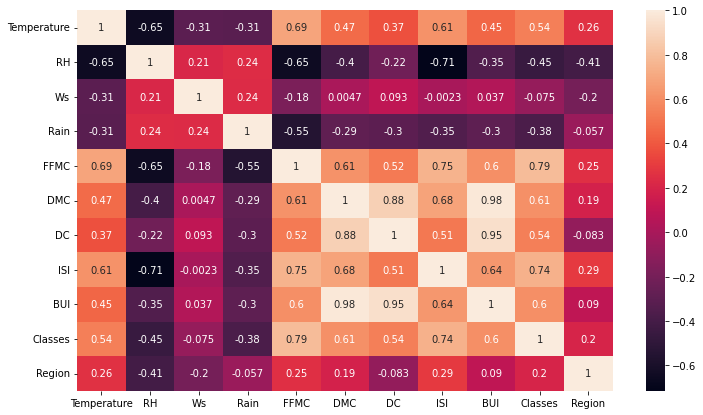

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(X_train.corr(),annot=True)

### Handling Collinearity

In [34]:
def correlation(dataset,threshold):
    col_matrix=dataset.corr()
    col_corr=set()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j])>threshold:
                col_corr.add(col_matrix.columns[i])
    return col_corr            

In [35]:
col_corr=correlation(X_train,0.85)

In [36]:
col_corr

{'BUI', 'DC'}

In [37]:
X_train.drop(col_corr,axis=1,inplace=True)
X_test.drop(col_corr,axis=1,inplace=True)

In [40]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

### StandardScaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
X_train_scaled=scaler.fit_transform(X_train)

In [45]:
X_test_scaled=scaler.transform(X_test)

### Box Plot to Understand Effect of Scaling

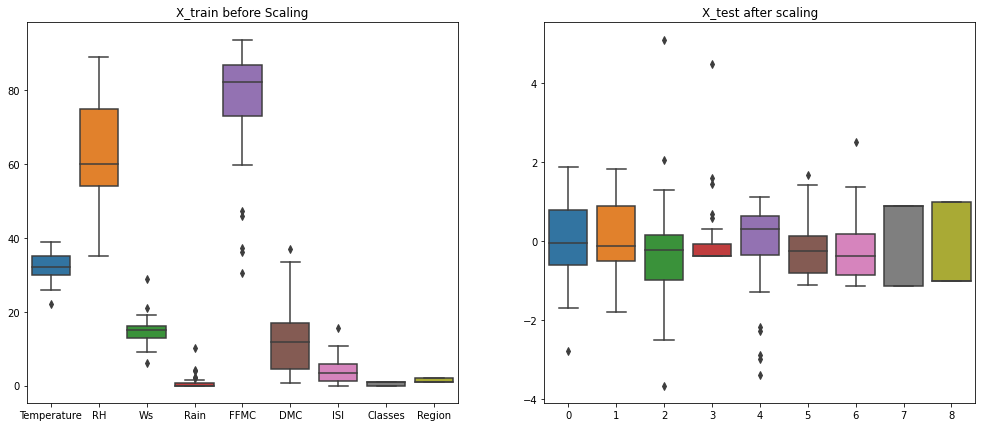

In [49]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.boxplot(data=X_test)
plt.title('X_train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_test_scaled)
plt.title('X_test after scaling')
plt.show()

## Model Training

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [55]:
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_predict=linear.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print('MAE',mae)
print('Score',score)

MAE 0.5049978694165663
Score 0.9805895859259883


### Lasso Regression

In [58]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_predict=lasso.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print('MAE',mae)
print('Score',score)

MAE 1.0093958923873407
Score 0.9430507350726562


### Ridge Regression

In [57]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_predict=ridge.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print('MAE',mae)
print('Score',score)

MAE 0.5192048325844736
Score 0.9801058063273601


### Elastic Net Regression

In [59]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_predict=elastic.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)
print('MAE',mae)
print('Score',score)

MAE 1.6834416340136709
Score 0.8676961352267807


## Pickling

In [60]:
import pickle

In [62]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('model.pkl','wb'))